<a href="https://colab.research.google.com/github/swarajpatankar/LGMVIP/blob/main/Task_2_Exploratory_Data_Analysis_on_Dataset_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2 - Exploratory Data Analysis on Dataset - Terrorism**

**Importing Dependencies**

In [15]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

Data Collection & Data Preprocessing

In [20]:
dataset = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [22]:
dataset.shape

(181691, 135)

Renaming the Columns for better understanding

In [23]:
dataset.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day','country_txt':'Country', 'region_txt': 'Region', 'provstate': 'State', 'city': 'City', 'attacktype1_txt': 'Attacktype', 'targtype1_txt': 'Targettype', 'gname': 'Group', 'weaptype1_txt':'Weapon', 'nkill':'Kill', 'nwound':'Wound' }, inplace = True)

Selecting useful columns

In [24]:
df = dataset[['Year', 'Month','Day','Country','State','Region','City','latitude','longitude','Attacktype','Kill','Wound','target1', 'summary','Group', 'Targettype', 'Weapon', 'motive']]

In [25]:
df.head()

,Year,Month,Day,Country,State,Region,City,latitude,longitude,Attacktype,Kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [26]:
df.shape

(181691, 18)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  Kill        171378 non-null  float64
 11  Wound       165380 non-null  float64
 12  target1     181055 non-null  object 
 13  summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  Targettype  181691 non-null  object 
 16  Weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [28]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
Kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

Replacing the NULL value with 0

In [29]:
df['Wound'] = df['Wound'].fillna(0)
df['Kill'] = df['Kill'].fillna(0)

In [30]:
df.describe()

,Year,Month,Day,latitude,longitude,Kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


Data Visualization

Attack according to year

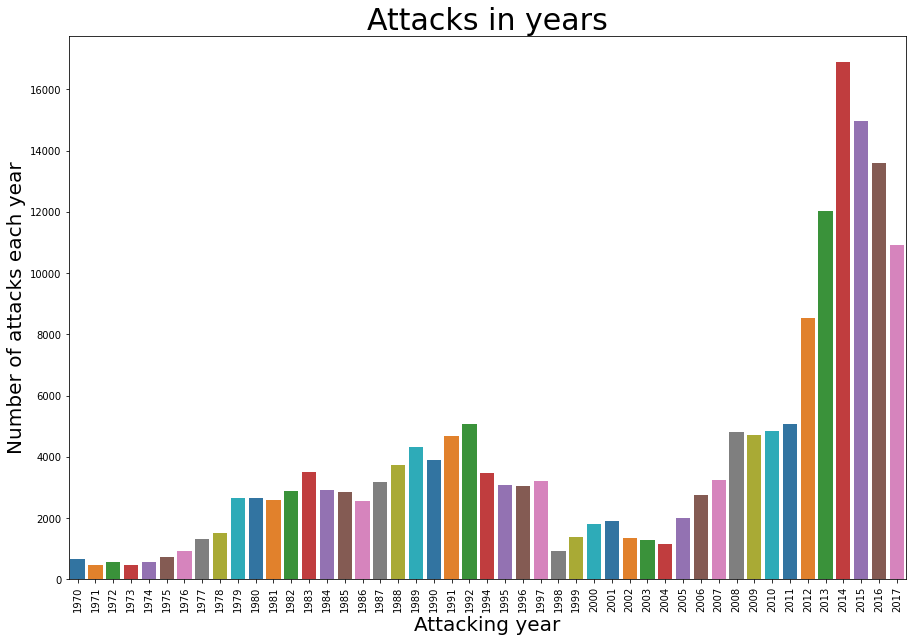

In [50]:
year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = False).sort_index()

plt.figure(figsize= (15, 10))
sns.barplot(x= year, y = years_count, palette= "tab10")

plt.xticks(rotation = 90)
plt.xlabel('Attacking year', fontsize = 20)
plt.ylabel('Number of attacks each year', fontsize = 20)
plt.title('Attacks in years', fontsize = 30)
plt.show()

attacks=df["Year"].value_counts(dropna=False).sort_index() 
attacks=pd.DataFrame(attacks).reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")

Value count of all months

In [32]:
df["Month"].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: Month, dtype: int64

In [33]:
df.drop(index=df[df["Month"]==0].index, inplace=True)

Attack in all months

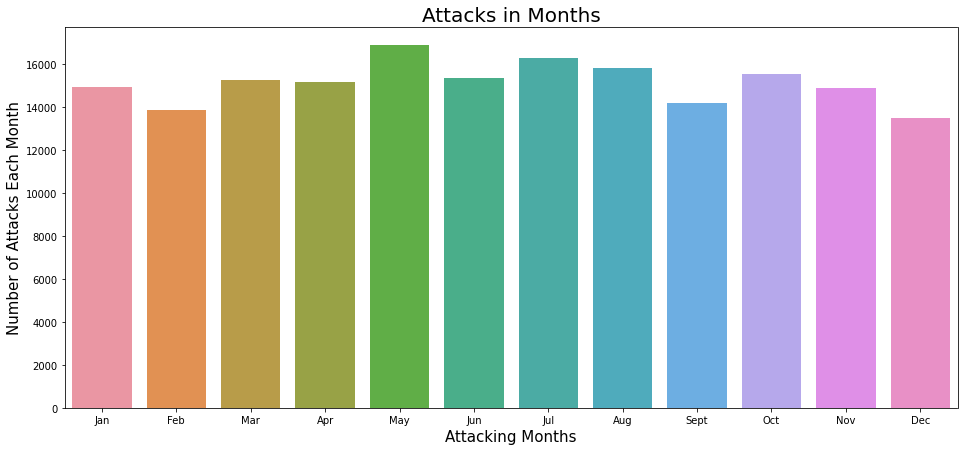

In [34]:
plt.figure(figsize=(16,7))
sns.countplot(x="Month",data=df)

positions = (0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
labels= ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec" )

plt.xticks(positions, labels, fontsize=10, rotation = 0)

plt.xlabel('Attacking Months', fontsize = 15)
plt.ylabel('Number of Attacks Each Month', fontsize = 15)
plt.title('Attacks in Months', fontsize = 20)
plt.show()

Terrorist activities By Region each year

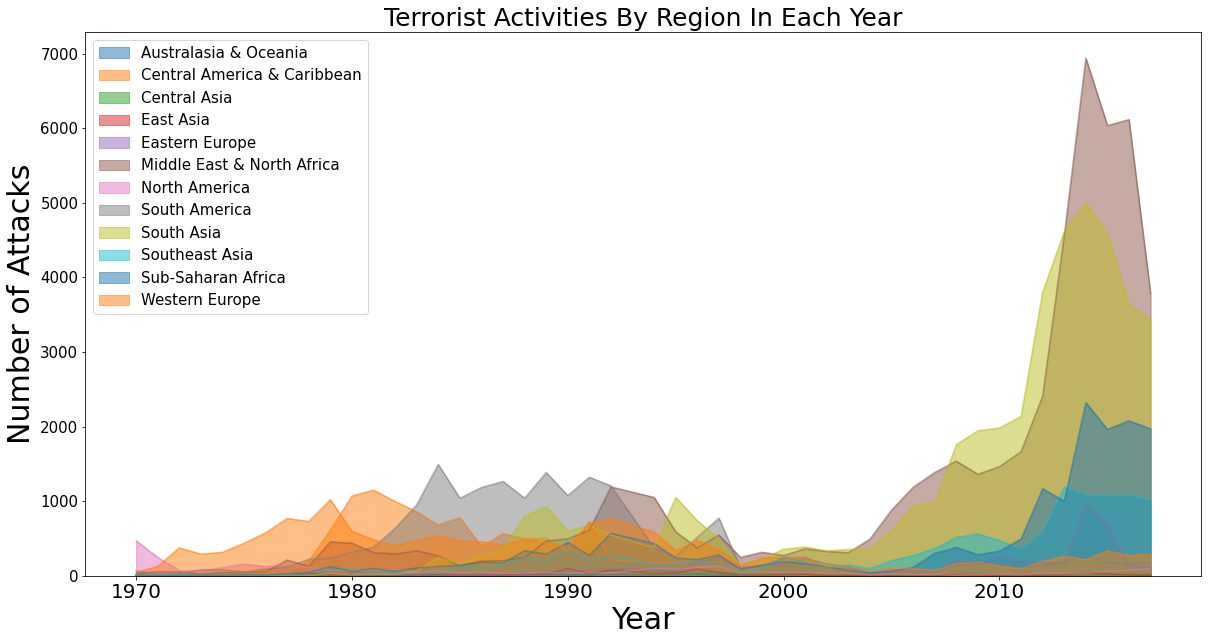

In [35]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=30)
plt.xlabel("Year",fontsize=30)
plt.legend(loc='upper left', fontsize=15)
plt.show()

People killed due to attack region wise

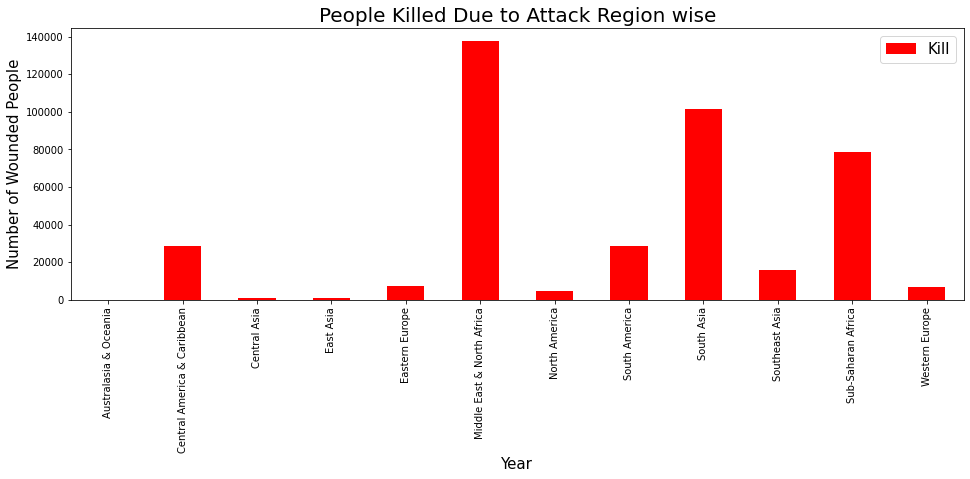

Region
Australasia & Oceania             150.0
Central America & Caribbean     28708.0
Central Asia                     1000.0
East Asia                        1149.0
Eastern Europe                   7415.0
Middle East & North Africa     137642.0
North America                    4916.0
South America                   28849.0
South Asia                     101319.0
Southeast Asia                  15637.0
Sub-Saharan Africa              78386.0
Western Europe                   6694.0
Name: Kill, dtype: float64

In [36]:
Kill_region=(df.groupby("Region").sum()["Kill"])
Kill_region

#Plotting 
plt.figure(figsize=(16,5))
Kill_region.plot(kind="bar", color="r")

plt.title('People Killed Due to Attack Region wise', fontsize = 20)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Number of Wounded People', fontsize = 15)
plt.legend(loc=0, fontsize=15)
plt.show()

Kill_region

In [37]:
attack = df.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14367
Afghanistan       12731
India             11960
Colombia           8304
Philippines        6906
Peru               6096
El Salvador        5319
United Kingdom     5235
Turkey             4290
Name: Country, dtype: int64

Finding attacks in different type of areas

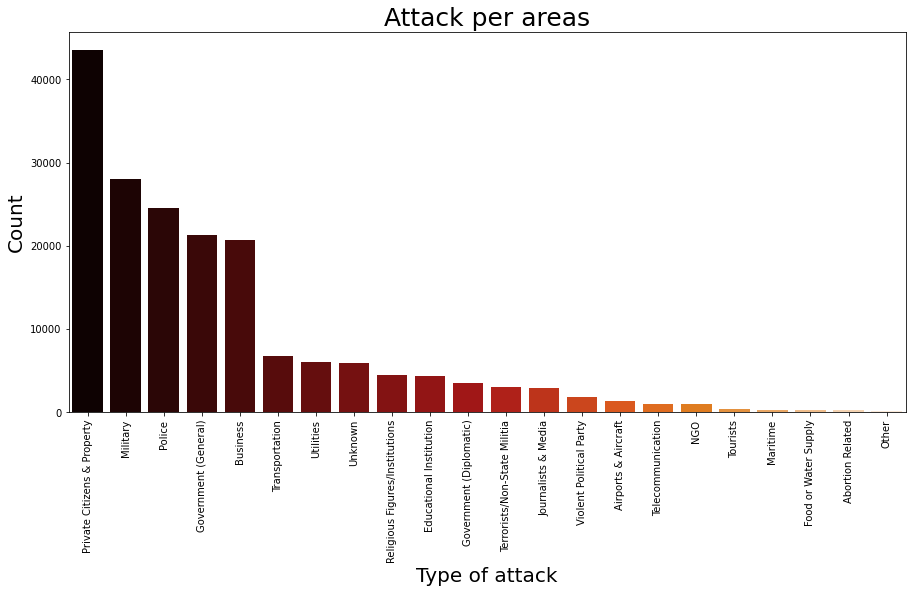

In [38]:
plt.figure(figsize=(15, 7))
sns.countplot(df.Targettype, order= df.Targettype.value_counts().index, palette="gist_heat")

plt.xticks(rotation= 90)
plt.xlabel('Type of attack', fontsize= 20)
plt.ylabel('Count', fontsize= 20)
plt.title('Attack per areas', fontsize= 25)

plt.show()

Check Top city affected By Pie chart

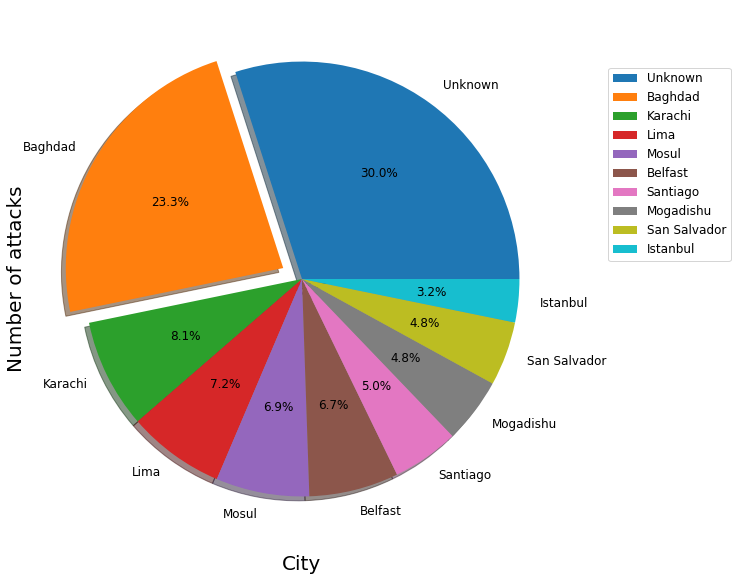

In [45]:
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
df['City'].value_counts().to_frame().sort_values('City', axis=0, ascending= False).head(10).plot(kind= 'pie', subplots=True, explode = explode,figsize=(10,10), shadow=True, textprops={'fontsize':12,'weight':'light','color':'k'}, autopct='%1.1f%%')

plt.xticks(rotation = 50)
plt.xlabel('City', fontsize=20, c='k')
plt.ylabel('Number of attacks', fontsize= 20, c= 'k')
plt.legend(loc='upper right', bbox_to_anchor =(1.3,0.9), fontsize=12)  #location of legend
plt.show()

Top 10 Terrorist Group as per attack Count

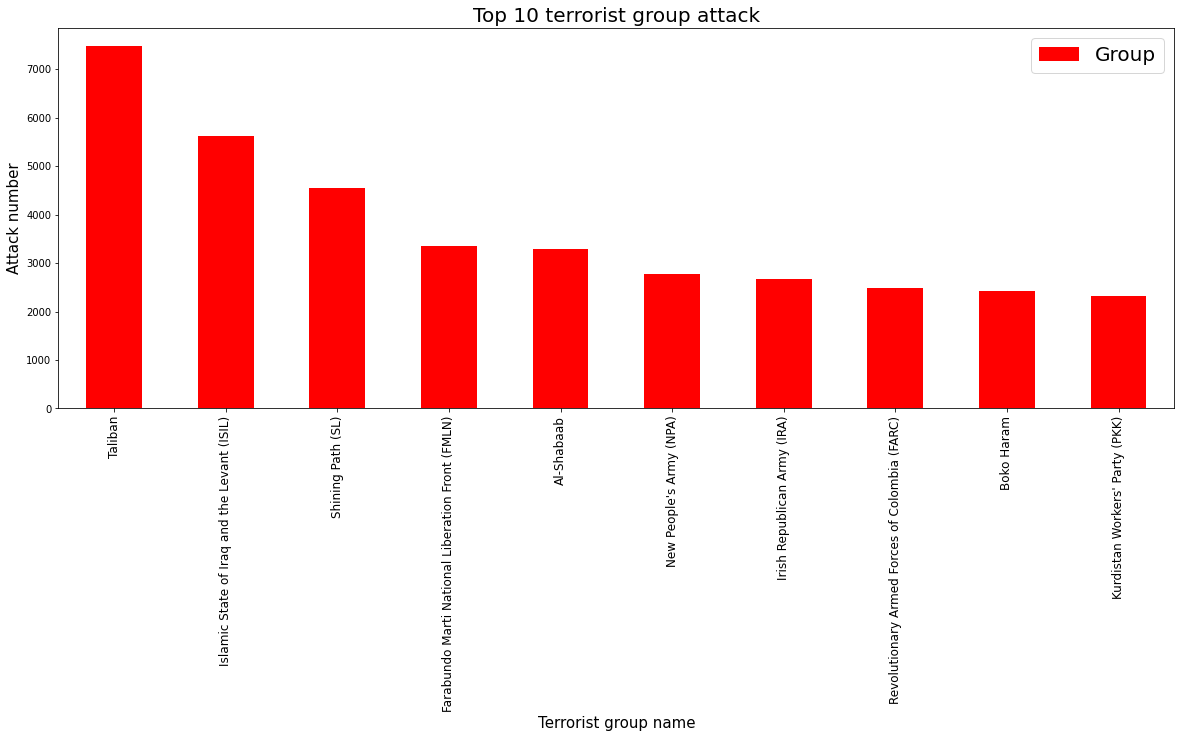

In [46]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='red',figsize=(20,7))

plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("Terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.xticks(fontsize= 12)
plt.legend(fontsize =20)
plt.show()

Number of peoples lost there lives

In [47]:
kill= df.loc[:,'Kill']
print('Number of People Killed by terror attack: ', int(sum(kill.dropna())))

Number of People Killed by terror attack:  411865


Number of kill country wise

In [48]:
countrykill = df.pivot_table(columns="Country", values ='Kill', aggfunc='sum')
countrykill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0
